# Preparing the Dataset

In [2]:
# fetch_housing_data()를 호출하면 현재 작업디렉터리에 datasets/housing 디렉터리를 만들고, 그 디렉터리에 housing.tgz 파일을 다운받고 압축까지 풀어 housing.csv 파일을 만든다

import os
import tarfile
import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

fetch_housing_data()

In [3]:
# load_housing_data()를 호출하면 housing.csv 파일의 데이터들을 pandas dataframe 객체를 반환한다

import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [4]:
# 데이터 구조 확인하기

housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
# 데이터셋에 20640개의 샘플이 있다
# total_bedrooms은 Null값이 20640-20433=207개 있다, 나중에 처리해줘야 함
# ocean_proximity 필드의 데이터 타입이 object이다, object 타입은 어떤 파이썬 객체도 될 수 있지만, 데이터를 csv 파일에서 읽어 들였기 때문에 텍스트 특성일 것이다, head()에서 열의 값이 반복되는 것으로 보아 이 특성은 아마도 범주형(categorical)일 것이다
# value_counts() 함수를 이용해서 ocean_proximity 특성에 어떤 카테고리가 있는지, 카테고리마다 얼마나 몇개의 데이터가 있는지 확인한다

housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
# ocean_proximity 특성의 정보를 확인

housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [7]:
# describe()는 숫자로 데이터의 형태를 파악하게 해준다

housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


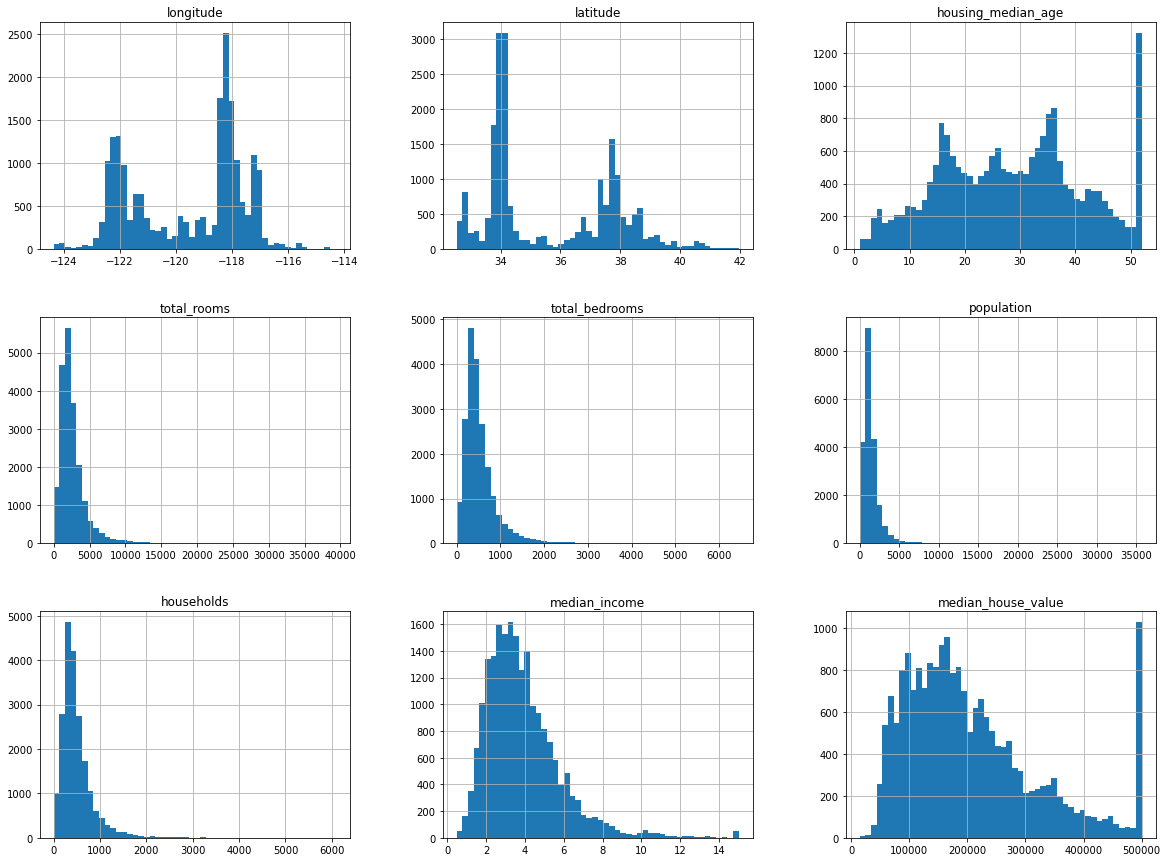

In [8]:
# describe()로 나타난 데이터의 형태를 빠르게 확인할 수 있는 방법으로는 각 특성에 따른 히스토그램을 그려보는 것이다
# 모든 숫자형 특성에 대한 히스토그램
# housing_median_age : 중간 주택 연도
# median_house_value : 중간 주택 가격
# 중간 주택 연도, 중간 주택 가격은 최댓값과 최솟값을 한정했다. 두 개 모두 타깃 속성(레이블, 종속변수, y)로 사용되기 때문에 문제가 야기될 수 있다. 이것이 문제가 될 지 안될지는 클라이언트 팀(시스템의 출력을 사용할 팀)과 함께 검토하는 것이 좋다. 만약 최댓값을 넘어가더라도 정확한 예측값이 필요하면 값을 한정해서는 안될 것이다.
# 이때 두 가지 방법이 있다. 1) 한계값 밖의 구역에 대한 정확한 레이블을 구한다. 2) 훈련 세트에서 한계값을 벗어나는 구역을 제거, 테스트 세트에서도 제거(테스트 시 성능이 안 좋다고 나올 수 있으므로)

import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

# 테스트 세트 만들기 (Test Data)

In [9]:
# 프로그램을 다시 실행하면 테스트 세트가 재설정 되기 때문에 전체 데이터셋을 보게 될 수 있다
# 위의 방법을 통해서 하면 테스트 세트가 재설정된다
# np.random.permutation(42)를 이용하면 난수 발생기의 초기값을 지정하여 항상 같은 데이터셋을 만들 수 있다
# 또는 처음 데이터셋을 만들고 난 후 파일로 저장하여 다시 실행할 때 불러오는 방법이 있다

# 하지만 데이터셋에 새로운 데이터가 추가되면 위 방법이 무의미하게 되는데, 이때는 샘플의 식별자(키값)에 해시값을 이용해서 훈련, 테스트 데이터를 지정하면 된다
# 이렇게 하면 여러 번 반복 실행되면서 데이터셋이 갱신되더라도 테스트 세트가 동일하게 유지된다

#import numpy as np

#def split_train_test(data, test_ratio):
#    shuffled_indices = np.random.permutation(len(data))
#    test_set_size = int(len(data) * test_ratio)
#    test_indices = shuffled_indices[:test_set_size]
#    train_indices = shuffled_indices[test_set_size:]
#    return data.iloc[train_indices], data.iloc[test_indices]

#train_set, test_set = split_train_test(housing, 0.2)
#len(train_set)
#len(test_set)


# 해시값을 이용해서 데이터셋을 분리
# 주택 데이터셋에는 식별자(Key) 컬럼이 없기 떄문에 행의 인덱스를 ID로 사용한다
from zlib import crc32
import numpy as np

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [10]:
# 데이터 프레임에 'index' 열이 추가된다
housing_with_id = housing.reset_index()

# "index" 열이 식별자 역할을 한다
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [11]:
# index를 고유 식별자로 사용할 경우
# 새 데이터를 추가하고자 하면 데이터셋의 끝에 추가되어야 하고 어떤 행도 삭제되어서는 안된다
# 이것이 불가능할 때는 고유 식별자를 만드는 데 안전한 특성을 사용해야 한다
# 비교적 안정적인 위도와 경도를 이용해서 (두 값을 연결하여) 식별자를 만들 수 있다

housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

사이킷런에서 데이터셋을 여러 서브셋으로 나누는 방법은 다양하다.
그 중 train_test_split의 특징
1) 난수 초기값을 지정할 수 있는 random_state 매개변수가 있다
2) 여러 개의 데이터셋을 넘겨서 같은 인덱스를 기반으로 나눌 수 있다
    2-1) 행의 개수가 같아야 한다
    2-2) 데이터프레임이 레이블에 따라 여러 개로 나뉘어 있을 때 매우 유용

In [12]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

# 계층적 샘플링 (Stratified Sampling)

In [13]:
# 데이터셋이 충분히 크지 않다면, 무작위 샘플링 방식을 사용할 경우 샘플링 편향이 발생할 수 있다
# 이때 계층적 샘플링을 진행한다 (Stratified Sampling)
# 계층별로 충분한 샘플이 있어야 한다, 그렇지 않으면 편향이 발생
# 너무 많은 계층으로 나누면 안된다


# 5개의 계층으로 나눈다
# 1.5M 단위로 범주를 정한다
# 소득 카테고리를 기준으로 계층 샘플링 할 준비를 한다
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1,2,3,4,5])
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


<AxesSubplot:>

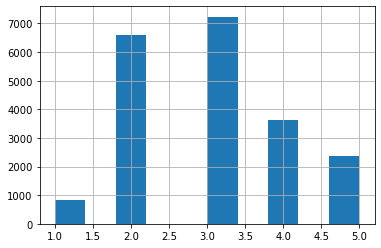

In [14]:
housing["income_cat"].hist()

In [15]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

#  테스트 세트에서의 소득 카테고리의 비율을 사렾본다
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [16]:
# income_cat 특성을 삭제해서 원래의 데이터셋으로 만들어준다
# drop 데이터프레임의 열, 행을 삭제하는 함수
# axis=1 : 열, axis=0 : 행

for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [17]:
# 훈련 데이터를 백업시켜 놓는다
housing = strat_train_set.copy()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

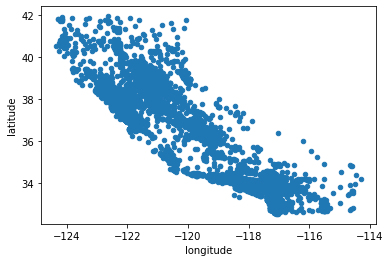

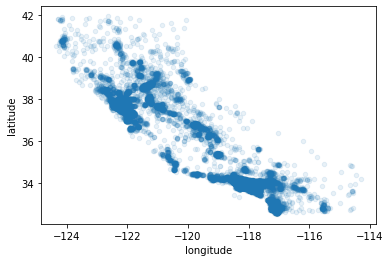

In [18]:
# 경도, 위도 정보 그래프로 나타내기
housing.plot(kind="scatter", x="longitude", y="latitude")
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

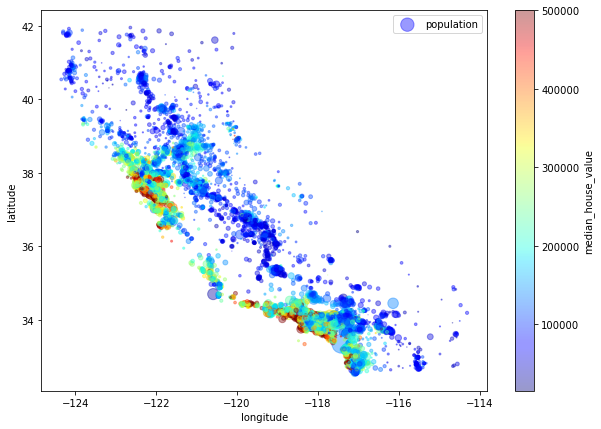

In [19]:
# 주택가격 나타내기
# 원의 반지름(매개변수 s) : 구역의 인구
# 색상 (매개변수 c) : 주택 가격
# 파란색 : 낮은가격, 빨간색 : 높은 가격

housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()

In [20]:
# 표준상관계수 (standard correlation coefficient, 피어슨의 r)
# -1 ~ 1 사이의 값이 나온다
# 0에 가까우면 상관관계가 없음
# 중간주택가격과 중간소득과는 양의 상관관계가 있다, 중간소득이 증가하면 중간주택가격도 증가한다

corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='longitude', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='latitude', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='longitude'>,
        <AxesSubplot:xlabel='longitude', ylabel='longitude'>,
        <AxesSubplot:xlabel='latitude', ylabel='longitude'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='latitude'>,
        <AxesSubplot:xlabel='longitude', ylabel='latitude'>,
        <AxesSubplot:xlabel='latitude', ylabel='latitude'>]], dtype=object)

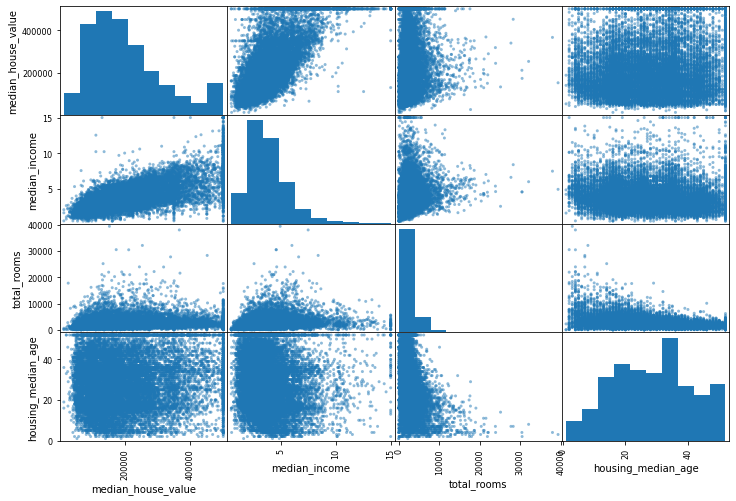

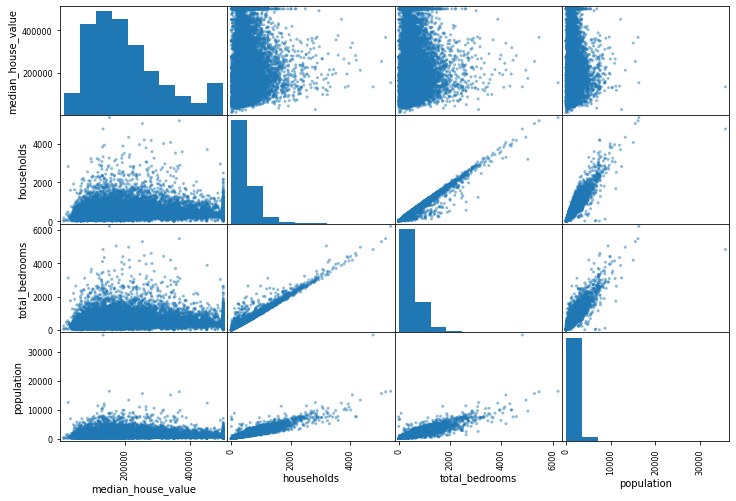

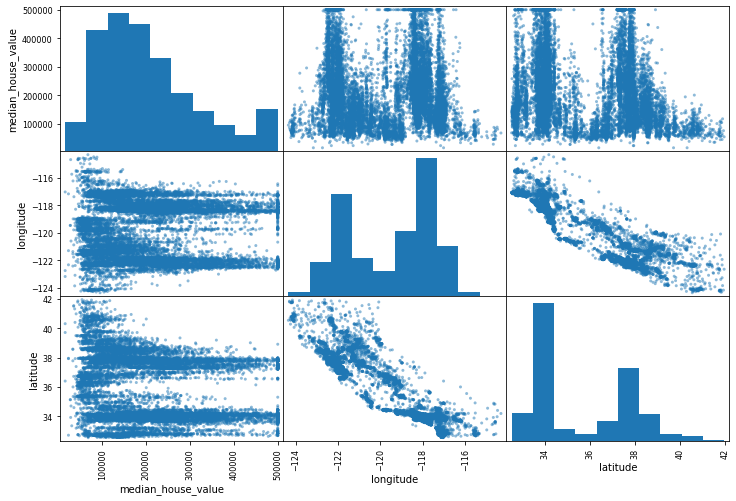

In [21]:
# 산점도를 이용해서 특성 사이의 상관관계를 확인해본다

from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12,8))

attributes = ["median_house_value", "households", "total_bedrooms", "population"]
scatter_matrix(housing[attributes], figsize=(12,8))

attributes = ["median_house_value", "longitude", "latitude"]
scatter_matrix(housing[attributes], figsize=(12,8))

# 상관관계분포 산점도 참고 사진

![SCC_scatter.png](/Users/hong_tae/Desktop/SCC_scatter.png)

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

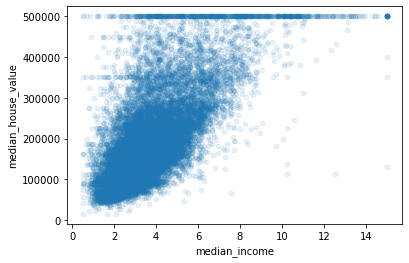

In [22]:
# 중간주택가격을 예측하는 데 가장 유용한 특성인 중간 소득과의 상관관계 산점도를 확인
# 아래 산점도를 보고 알 수 있는 것
# 1.상관관계가 매우 강하다
# 2.수평선이 나타나는 지점들을 제거해서 이상한 형태를 학습하지 않게 해줘야 한다

housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

In [23]:
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["population_per_household"] = housing["population"] / housing["households"]

corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

In [24]:
# strat_train_set을 복사한다

housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

# Data Pre-Processing

In [25]:
# total_bedrooms에 값이 없었던 것들을 처리해준다
# 1.해당 구역을 삭제
# 2.전체 특성을 삭제
# 3.어떤 값으로 채움 (0, 평균, 중간값 등)

# # 1.널값을 그냥 삭제한다
# housing.dropna(subset=["total_bedrooms"])
#
# # 2.total_bedrooms 특성을 삭제한다
# housing.drop("total_bedrooms", axis=1)
#
# # 3.값이 없는 것들을 total_bedrooms 특성의 중앙값으로 치환한다
# median = housing["total_bedrooms".median()]
# housing["total_bedrooms"].fillna(median, inplace=True)

In [26]:
# 사이킷런의 SimpleImputer 함수는 누락된 값을 처리해주는 함수이다

from sklearn.impute import SimpleImputer

# 누락된 값을 중간값으로 대체한는 SimpleImputer 객체를 생성한다
imputer = SimpleImputer(strategy="median")
# 중간값으로의 대체는 수치형 특성에만 들어갈 수 있기 때문에, ocean_proximity 특성은 제외한 데이터를 복사한다
housing_num = housing.drop("ocean_proximity", axis=1)
# housing_num 훈련데이터에 imputer.fit() 함수를 통해 누락된 값을 처리해준다
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [27]:
# imputer 객체는 각 특성의 중간값을 계산해서, 그 결과를 imputer 객체의 statistics_ 속성에 저장한다
# 각 속성의 중간값 확인
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [28]:
# imputer 객체를 사용해서 훈련 세트에서 누락된 값을 statistics_에 저장된 중간값으로 바꿀 수 있다
# imputer 객체를 통해 누락된 값을 바꾸고 나면 넘파이 배열로 반환된다, 이를 X에 저장
X = imputer.transform(housing_num)

In [29]:
# 넘파이 배열을 판다스 데이터프레임으로 변경
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

# 텍스트, 범주형 특성 다루기

In [30]:
# housing 데이터셋에서 ocean_proximity 특성이 텍스트 형태를 가지고 있다
# 처음 10개의 샘플을 살펴본다
# 샘플들이 임의의 값이 아닌, 정해진 범주를 따르고 있다
# 따라서 이것은 범주형 특성이다

housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [37]:
# 범주형 특성이기에 이를 숫자로 변환한다
# 사이킷런의 OrdinalEncoder를 사용하면 텍스트를 숫자로 변환할 수 있음

from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [38]:
# 범주형 특성에 어떤 카테고리가 있는지 확인한다

ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [39]:
# 현재 카테고리 별로 0~4의 정수가 할당되어 있다
# 0~4의 정수가 할당되어 있으면 가까이 있는 정수의 값들이 의미를 가질 수 있다
# 따라서 카테고리 별로 0과 1을 이용해서 이진 특성을 만든다 (범주의 값을 원-핫 벡터로 바꾼다)
# 이것이 바로 원-핫 인코딩(one-hot encoding)이다 (하나의 1(hot)을 가지는 인코딩)
# 사이킷런에서 제공하는 OnehotEncoder 클래스를 이용한다

from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [40]:
# 원-핫 인코딩을 하면 1을 가진 원소의 위치만 저장한다
# 따라서 이것을 넘파이 배열로 바꾸어 시각적으로 보려면 toarray() 함수를 이용하면 된다

housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [41]:
# 원-핫 인코딩을 한 후에도 categories_ 를 이용해서 범주(카테고리)의 리스트를 얻을 수 있다

cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [42]:
# 나만의 변환기 구현
# 특성들을 조합하여 전처리하기 위해서

from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3,4,5,6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, rooms_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]

        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

# 특성 스케일링 (Feature Scaling)

In [ ]:
# 머신러닝 알고리즘은 숫자 특성값들의 스케일이 많이 다르면 제대로 작동하지 않는다
# 예를 들어 주택가격과 같은 것이다, 주택가격의 스케일을 낮춰주어야 한다

# 스케일링을 위해 'min-max 스케일링(정규화, Normalization)', '표준화(Standardization)'가 사용된다
# min-max 스케일링 : MinMaxScaler 변환기를 사용, 0~1 사이로 스케일링된다
# 표준화 : StandardScaler 변환기를 사용, 평균이 0이 되고 분산이 1이 되도록 설정, 표준화는 이상치의 영향을 덜 받는다

In [ ]:
# 변환 파이프라인
# 데이터 전처리 과정에서 변환 단계가 많기 때문에 정확한 순서대로 진행되어야 한다
# 사이킷런의 Pipeline 클래스를 통해 순서대로 변환을 할 수 있다

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])